# SEGMENTATION

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import ndimage
from skimage import exposure
import mkl_fft as mf
from skimage import feature
from skimage.morphology import skeletonize

In [2]:
import sys
sys.path.insert(0, '/home/svoigt6/Projects/pymks')

import importlib
from filter_tools import gBlur, gGrad, local_avg, conv_dilate, mk_circle, do_rem_obj

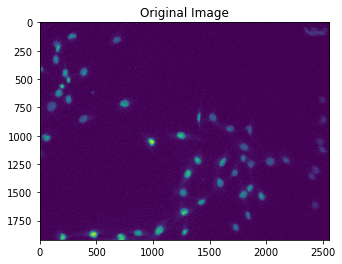

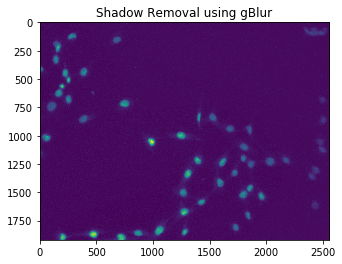

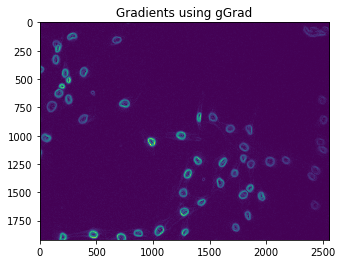

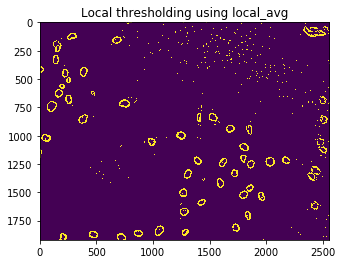

In [19]:
imgNum = 4
loc = 'fluorImgs2/b' + str(imgNum) + '.tif'
imgNuc = mpimg.imread(loc)

imgNew = imgNuc[:,:,1].copy()

plt.imshow(imgNew)
plt.title('Original Image')
plt.show()

imgNew = imgNew - gBlur(imgNew, 500)

plt.imshow(imgNew)
plt.title('Shadow Removal using gBlur')
plt.show()

grad1 = gGrad(imgNew, sigma = 4)

plt.imshow(grad1)
plt.title('Gradients using gGrad')
plt.show()

gradTh = grad1.copy()
gradTh = gradTh - local_avg(grad1, rad = 500)
gradTh = gradTh > local_avg(grad1, rad = 20)

plt.imshow(gradTh)
plt.title('Local thresholding using local_avg')
plt.show()

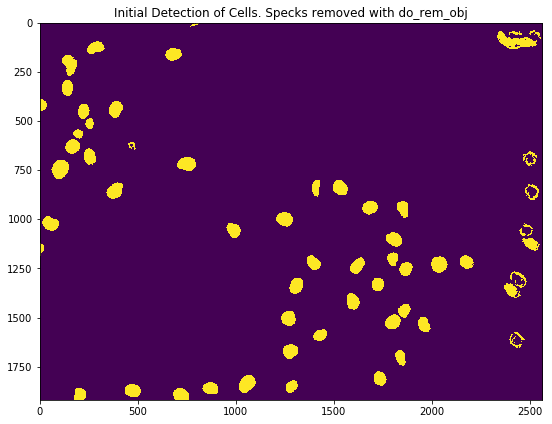

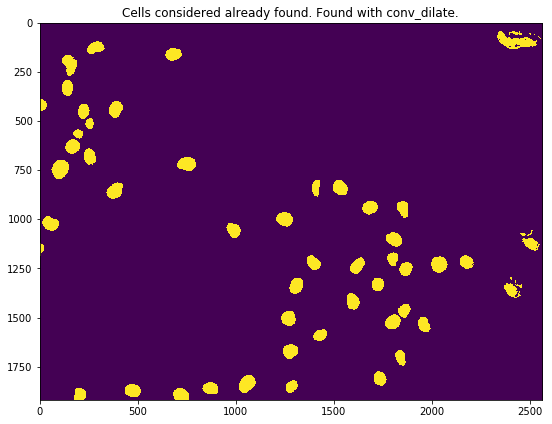

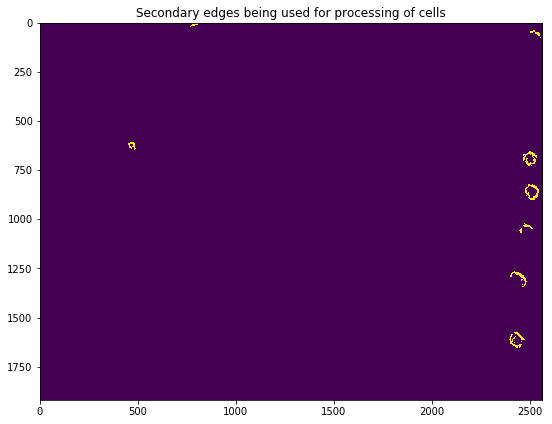

In [28]:
cells1 = gradTh.copy()

cells1, label_im = do_rem_obj(cells1, 200, 'less')
fills1, label_im = do_rem_obj(1-cells1, 20000, 'gre')
fills1, label_im = do_rem_obj(fills1, 200, 'less')

cells1 = cells1 + fills1

fig, axs = plt.subplots(1,1,figsize=(9,9))
axs.imshow(cells1)
axs.set_title('Initial Detection of Cells. Specks removed with do_rem_obj')
plt.show()

cells_already_found = (conv_dilate(fills1, 40) > 0.1).astype(np.int)

cells_to_process = (gradTh - img10) > 0

cells_to_process, label_im = do_rem_obj(cells_to_process, 200, 'less')

cells1 = (cells1-cells_to_process) > 0

fig, axs = plt.subplots(1,1,figsize=(9,9))
axs.imshow(cells1)
axs.set_title('Cells considered already found. Found with conv_dilate.')
plt.show()

fig, axs = plt.subplots(1,1,figsize=(9,9))
axs.imshow(cells_to_process)
axs.set_title('Secondary edges being used for processing of cells')
plt.show()

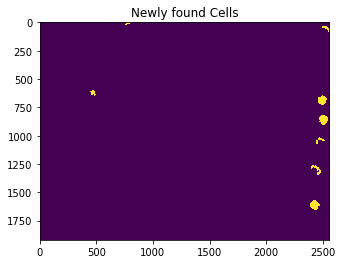

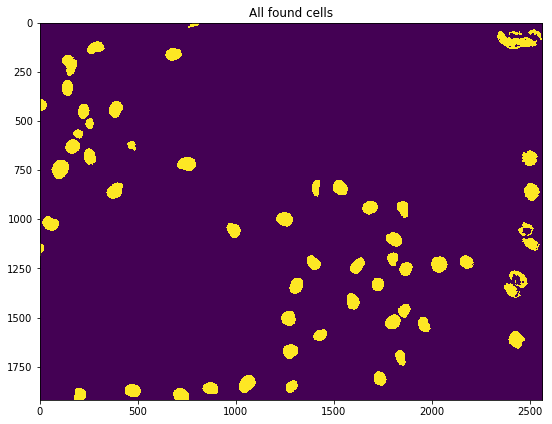

In [35]:
cells2 = cells_to_process.copy()

cells2_dilated = (conv_dilate(cells2, 4) > 0.1).astype(np.int)
fills2, label_im = do_rem_obj(1-cells2_dilated, 50000, 'gre')

cells2 = cells2+fills2
cells2 = conv_dilate(cells2, 4) > 0.1

plt.imshow(cells2)
plt.title('Newly found Cells')
plt.show()

cells_all = cells1 + cells2

fig, axs = plt.subplots(1,1,figsize=(9,9))
axs.imshow(cells_all)
axs.set_title('All found cells')
plt.show()

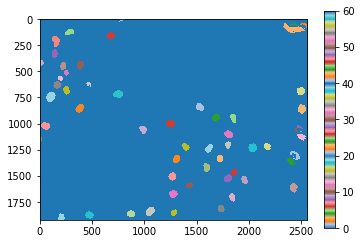

In [37]:
from matplotlib.colors import LinearSegmentedColormap
label_im, nb_labels = ndimage.label(cells_all)
cols = [plt.cm.tab20(i) for i in range(20)]
l = len(np.unique(label_im))
cols = cols * (l // 20)
cols = cols + cols[:(l % 20)]
plt.imshow(label_im, cmap = LinearSegmentedColormap.from_list('cols', cols))
plt.colorbar()
plt.show()

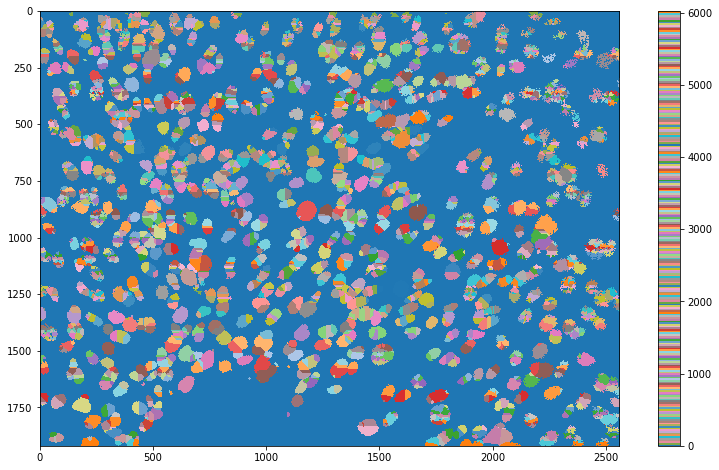

In [50]:
from skimage import morphology
from skimage.morphology import watershed
from skimage.feature import peak_local_max
from scipy import ndimage
from skimage.color import label2rgb

distance = ndimage.distance_transform_edt(imgB)

local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)), labels=imgB, threshold_rel = 0.1)

markers = morphology.label(local_maxi)

labels_ws = watershed(-distance, markers, mask=imgB)

plt.figure(figsize = (14,8))
cols = [plt.cm.tab20(i) for i in range(20)]
l = len(np.unique(labels_ws))
cols = cols * (l // 20)
cols = cols + cols[:(l % 20)]
plt.imshow(labels_ws, cmap = LinearSegmentedColormap.from_list('cols', cols))
plt.colorbar()
plt.show()

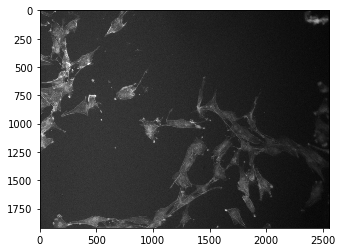

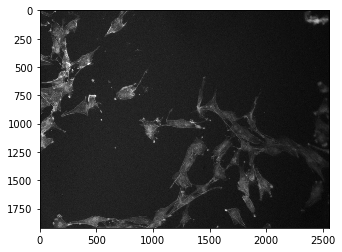

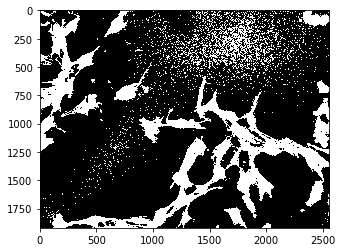

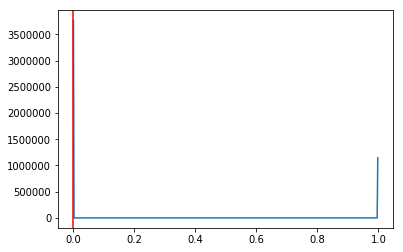

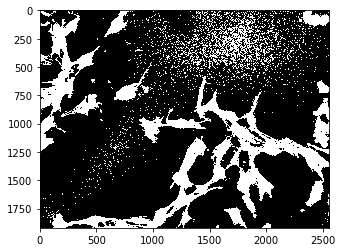

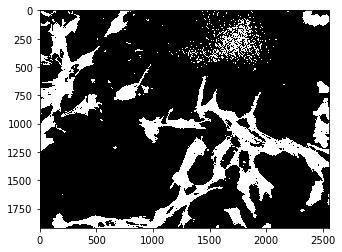

In [43]:
imgNum = 4

loc = 'fluorImgs2/g' + str(imgNum) + '.tif'
imgCyto = mpimg.imread(loc)

imgG = imgCyto[:,:,1]
imgG = imgG.astype(np.float)
imgG = imgG/np.max(imgG)
plt.imshow(imgG, cmap = 'gray')
plt.show()

imgG = imgG - gBlur(imgG, sigma = 700)
plt.imshow(imgG, cmap = 'gray')
plt.show()

imgG = imgG > local_avg(imgG, 600)
plt.imshow(imgG, cmap = 'gray')
plt.show()

hist, bins = np.histogram(imgG.ravel(), bins = 500)

th = 0#threshold_otsu(imgG)

plt.plot(bins[:-1], hist)
plt.axvline(th, color='r')
plt.show()

imgG = imgG > th
plt.imshow(imgG, cmap = 'gray')
plt.show()

# Closing Small Regions
label_im, nb_labels = ndimage.label(imgG)
sizes = ndimage.sum(imgG, label_im, range(nb_labels + 1))
smallReg = sizes < 50
remove_pixel = smallReg[label_im]
imgG[remove_pixel] = 0
plt.imshow(imgG, cmap = 'gray')
plt.show()

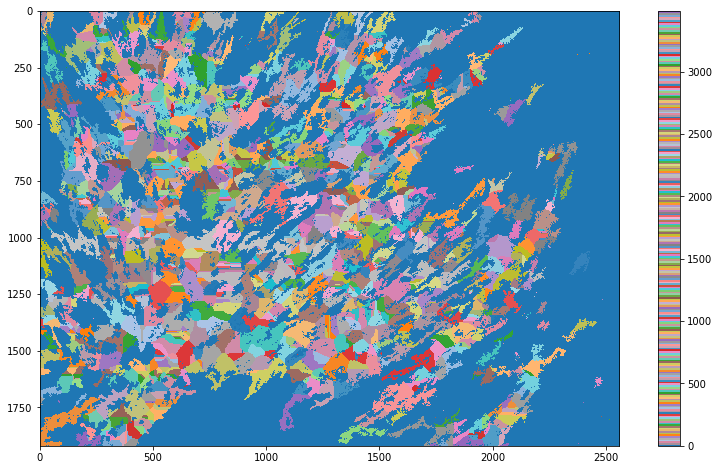

In [49]:
labels_ws_G = watershed(-distance, markers, mask=imgG)

plt.figure(figsize = (14,8))
cols = [plt.cm.tab20(i) for i in range(20)]
l = len(np.unique(labels_ws_G))
cols = cols * (l // 20)
cols = cols + cols[:(l % 20)]
plt.imshow(labels_ws_G, cmap = LinearSegmentedColormap.from_list('cols', cols))
plt.colorbar()
plt.show()